# Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 99% 156M/158M [00:01<00:00, 148MB/s]
100% 158M/158M [00:01<00:00, 145MB/s]


In [3]:
!unzip "/content/covid19-image-dataset.zip" -d "/content/dataset/"

Archive:  /content/covid19-image-dataset.zip
  inflating: /content/dataset/Covid19-dataset/test/Covid/0100.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0102.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0105.png  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0106.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0108.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0111.jpg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0112.jpg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0113.jpg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0115.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0118.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0119.jpeg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/0120.jpg  
  inflating: /content/dataset/Covid19-dataset/test/Covid/094.png  
  inflating: /content/dataset/Covid19-dataset/test/Covid/096.png 

(-0.5, 2666.5, 2279.5, -0.5)

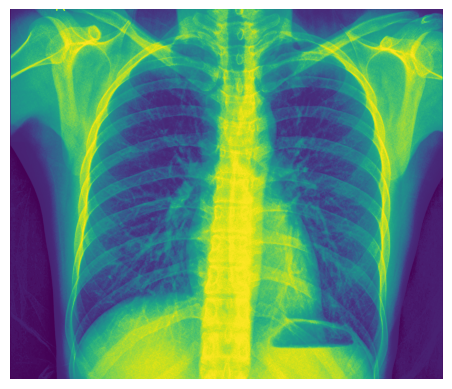

In [4]:
image_path = '/content/dataset/Covid19-dataset/train/Normal/05.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.axis('off')

# Displaying the Binary Image

In [5]:
threshold = 128
binary_image = np.where(image > threshold, 1, 0).astype(np.uint8)

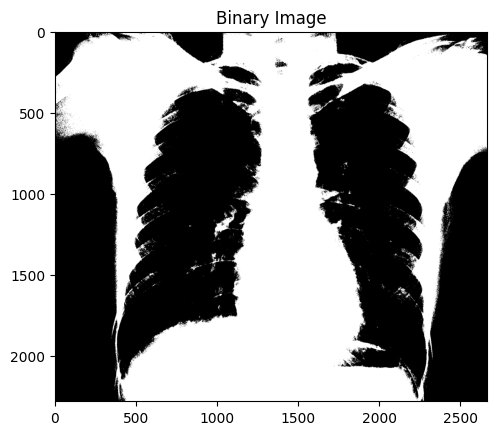

In [6]:
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

# Erosion of the image before and after

In [7]:
kernel = np.ones((3, 3), dtype=np.uint8)

def image_erosion(input_image, kernel):
    img_h, img_w = input_image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    result_image = np.zeros_like(input_image)
    padded_img = np.pad(input_image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    for row in range(pad_h, img_h + pad_h):
        for col in range(pad_w, img_w + pad_w):
            region = padded_img[row - pad_h:row + pad_h + 1, col - pad_w:col + pad_w + 1]

            if np.min(region) == 1:
                result_image[row - pad_h, col - pad_w] = 1

    return result_image

In [8]:
eroded_image = image_erosion(binary_image, kernel)

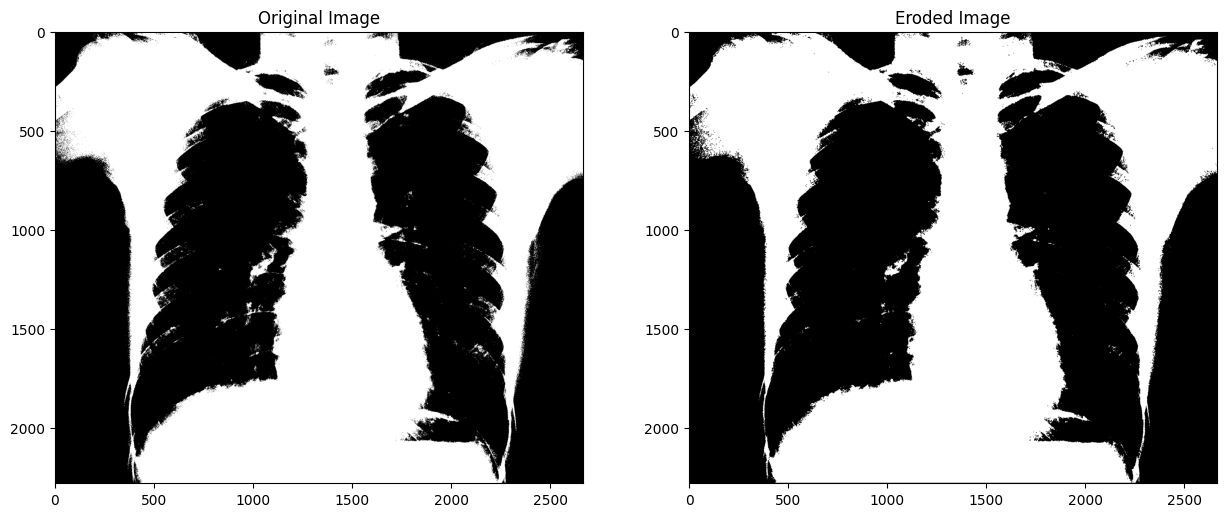

In [9]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')

plt.show()

# Dilation of the image

In [10]:
kernel = np.ones((3, 3), dtype=np.uint8)

def image_dilation(input_image, struct_elem):
    img_h, img_w = input_image.shape
    k_h, k_w = struct_elem.shape
    padding_h, padding_w = k_h // 2, k_w // 2
    dilated_image = np.zeros_like(input_image)
    padded_img = np.pad(input_image, ((padding_h, padding_h), (padding_w, padding_w)), mode='constant', constant_values=0)
    for x in range(padding_h, img_h + padding_h):
        for y in range(padding_w, img_w + padding_w):
            region = padded_img[x - padding_h:x + padding_h + 1, y - padding_w:y + padding_w + 1]
            if np.sum(region * struct_elem) > 0:
                dilated_image[x - padding_h, y - padding_w] = 1

    return dilated_image

In [11]:
dilated_image = image_dilation(binary_image, kernel)

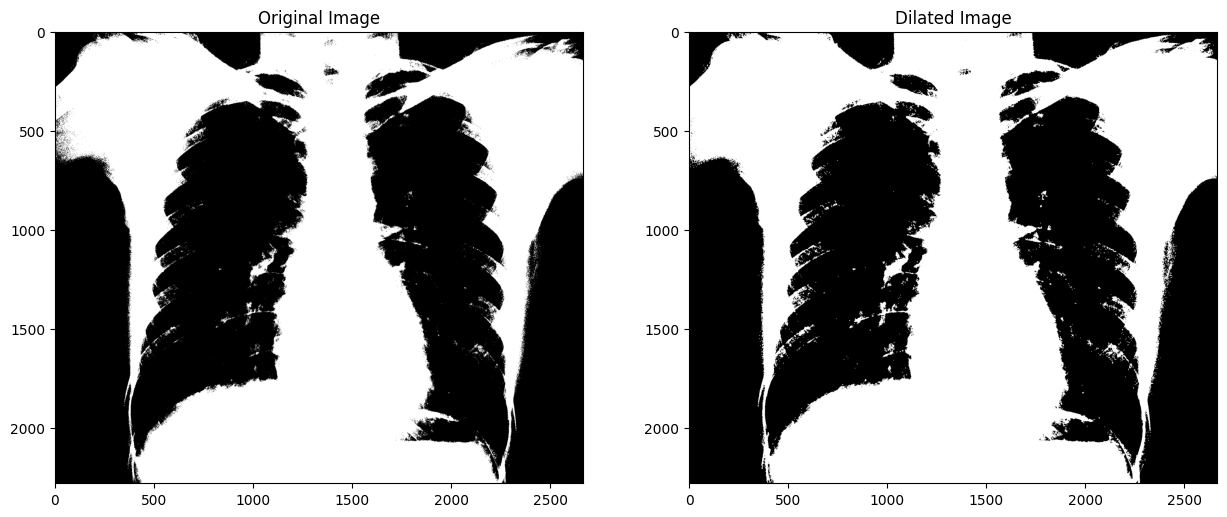

In [12]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray')

plt.show()

# Opening of the image

In [13]:
def image_opening(image, kernel):
    eroded_image = image_erosion(image, kernel)
    opened_image = image_dilation(eroded_image, kernel)
    return opened_image

In [14]:
opened_image = image_opening(binary_image, kernel)

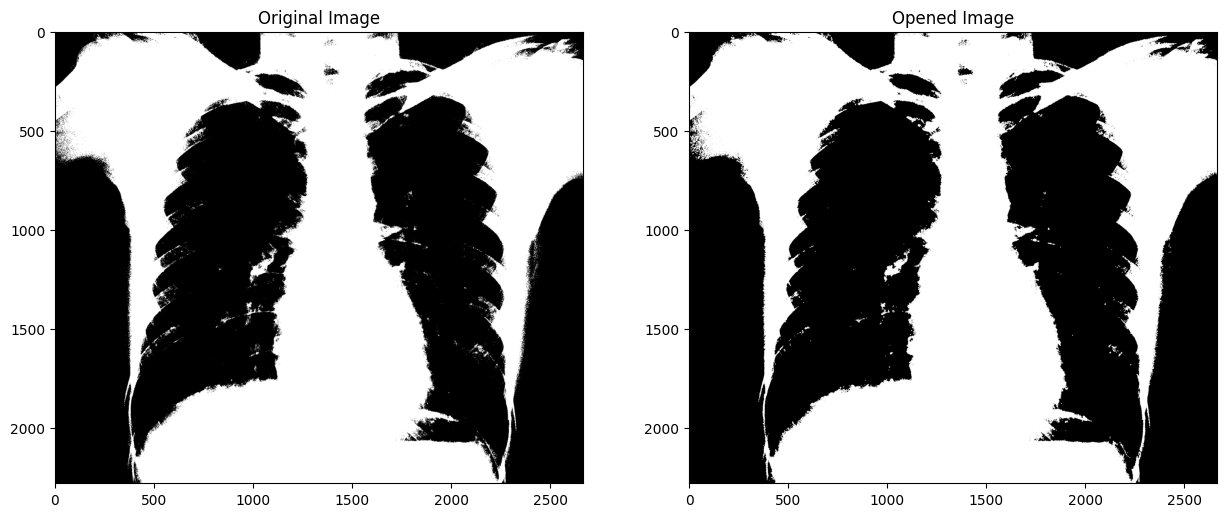

In [15]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Opened Image")
plt.imshow(opened_image, cmap='gray')

plt.show()

# Closing of the image

In [16]:
def image_closing(image, kernel):
    dilated_image = image_dilation(image, kernel)
    closed_image = image_erosion(dilated_image, kernel)
    return closed_image

In [17]:
closed_image = image_closing(binary_image, kernel)

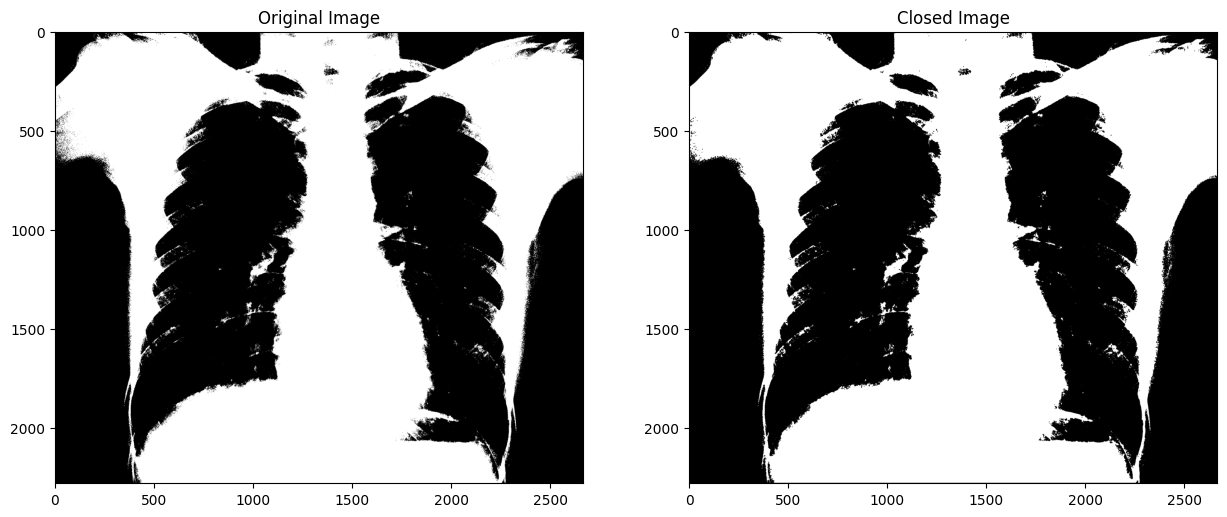

In [18]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Closed Image")
plt.imshow(closed_image, cmap='gray')

plt.show()

# Hit or Miss Structure and displaying the image

In [19]:
def hit_or_miss(input_image, structuring_element):
    img_h, img_w = input_image.shape
    k_h, k_w = structuring_element.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    hit_miss_output = np.zeros_like(input_image)

    padded_img = np.pad(input_image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    for x in range(pad_h, img_h + pad_h):
        for y in range(pad_w, img_w + pad_w):
            local_region = padded_img[x - pad_h:x + pad_h + 1, y - pad_w:y + pad_w + 1]

            if np.all((local_region == structuring_element) | (structuring_element == 0)):
                hit_miss_output[x - pad_h, y - pad_w] = 1

    return hit_miss_output

In [20]:
hit_and_miss_image = hit_or_miss(binary_image, kernel)

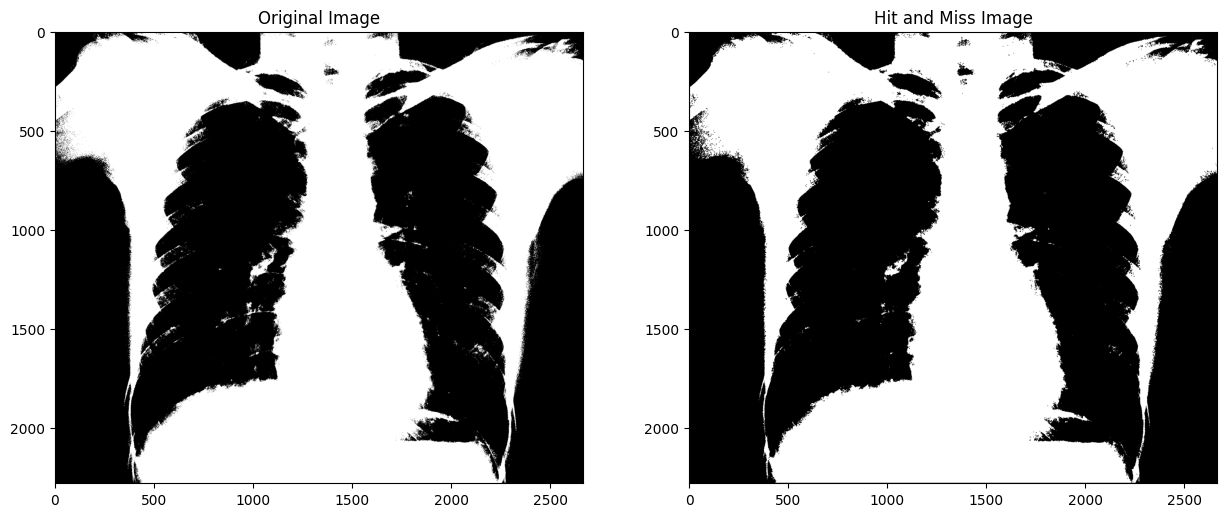

In [21]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Hit and Miss Image")
plt.imshow(hit_and_miss_image, cmap='gray')

plt.show()

# Applications

 **1. Dilation**

* Object Expansion: Dilation expands the boundaries of objects, making it useful for filling small gaps or holes in binary images.

* Connecting Components: It connects disjoint elements in an image, which is helpful in tasks like character recognition or feature detection.

* Foreground Enhancement: By enlarging foreground objects, dilation increases their visibility.

**2. Erosion**
* Noise Reduction: Erosion removes small-scale noise by eroding the edges of objects in binary images.

* Shape Simplification: It simplifies object shapes, which is useful for shape analysis.

* Boundary Extraction: When followed by dilation, erosion helps extract object boundaries effectively.

**3. Closing**
* Filling Holes: Closing fills small holes within the foreground of a binary image, making objects more solid and continuous.

* Connecting Objects: It can merge nearby objects, which is valuable in applications like medical imaging where structures are close together.

* Noise Smoothing: Closing smooths out object boundaries, helping to reduce noise in the image.

**4. Opening**

* Small Object Removal: Opening eliminates small objects while maintaining the shape and size of larger ones, often used as a preprocessing step.

* Background Separation: Helps in separating objects from the background in images with varying intensity.

* Skeletonization: Thins out objects while preserving their structure and topology.

**5. Hit-or-Miss Transformation**

* Shape and Pattern Detection: Useful for identifying specific shapes or patterns in binary images, especially in tasks like character recognition or object detection.

* Feature Extraction: It can detect particular configurations or features within an image.

* Pattern Recognition: Effective for identifying specific foreground and background pixel arrangements in binary images.

# Conclusion

* Morphological transformations, such as dilation, erosion, opening, closing, and hit-or-miss, are fundamental in image processing and computer vision.
* These techniques manipulate the structure and shape of objects within an image, enabling tasks like noise removal, feature extraction, and object detection.
* Their applications are vast, ranging from medical imaging and document analysis to pattern recognition, highlighting their significance in improving the clarity and interpretability of visual data.
* Mastering these transformations can greatly enhance the effectiveness of image processing tasks, making them indispensable tools for researchers and professionals in the field.